![Alt text](image-10.png)

Note that the uses vectorisation to save computational time. The result is that there is correlation between the proportions between different values of n. To remove this, the values would need to be re-randomised before calculating the proportion of the next value of n.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

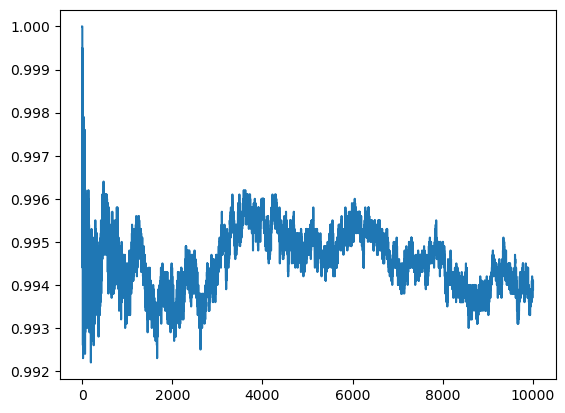

In [2]:
alpha = 0.05
p = 0.4
n=10000
m=10000
i = np.arange(1,n+1)

epsilon = np.sqrt(np.log(2 / alpha) / (2 * i))
xis = np.random.choice([0,1], size = (m,n), p=[1-p, p])
phats = np.cumsum(xis, axis = 1) / i

mask = (np.abs(phats-p)<epsilon)
props = mask.sum(axis = 0)/m

plt.plot(i, props)
plt.show()



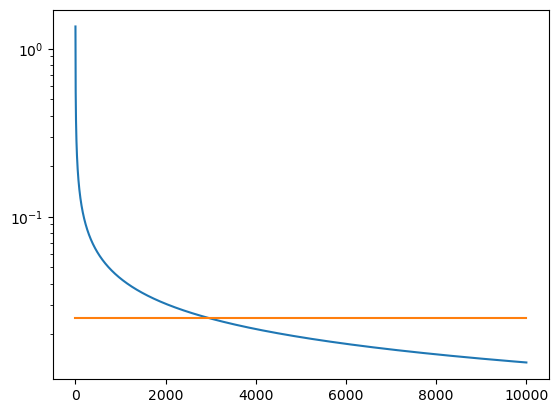

n must be greater than  2951


In [3]:
plt.plot(i, epsilon)
plt.yscale('log')
plt.plot([1,10000], [0.025, 0.025])
plt.show()

print('n must be greater than ', np.argmin(abs(epsilon - 0.025))+1)

![Alt text](image-11.png)

In [28]:
def true_prob(t):
    return 1 - norm.cdf(t) + norm.cdf(-t)

def E(k):
    if k == 0: return 1 / 2
    elif k == 1: return 1 / np.sqrt(2 * np.pi)
    else: return k * E(k-2)
    

def markov_bound(t, k):
    return E(k) / (t  ** k)

def mill_bound(t):
    return np.sqrt(2 / np.pi) * np.exp(- t ** 2 / 2) / t

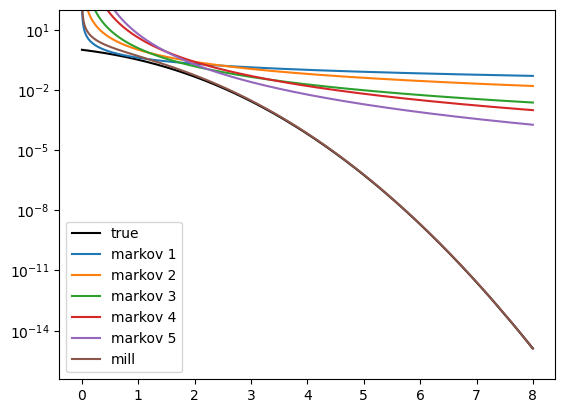

In [35]:
ks = np.array([1, 2, 3, 4, 5])
x = np. linspace(0.001, 8, 10000)

true_y = true_prob(x)
mill_y = mill_bound(x)

plt.plot(x, true_y, label = 'true', color = 'k')
for k in ks:
    markov_y = markov_bound(x, k)
    plt.plot(x, markov_y, label = 'markov ' + str(k))
plt.plot(x, mill_y, label = 'mill')
plt.yscale('log')
plt.ylim(top = 100)
plt.legend()
plt.show()

![Alt text](image-12.png)

In [36]:
def mean_mill_bound(t, n):
    return np.sqrt(2 / np.pi) * np.exp( - t ** 2 * n / 2) / (t * np.sqrt(n))

def mean_chebychev_bound(t, n):
    return 1 / (n * t ** 2)

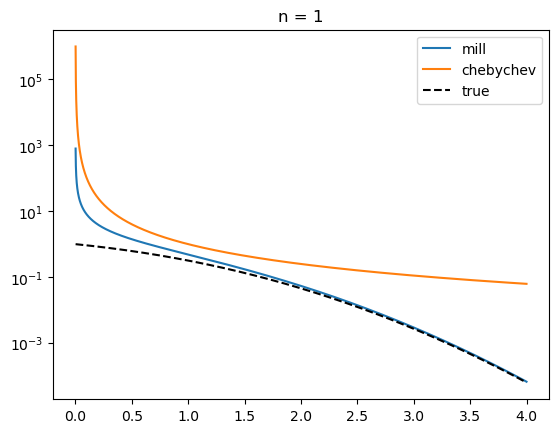

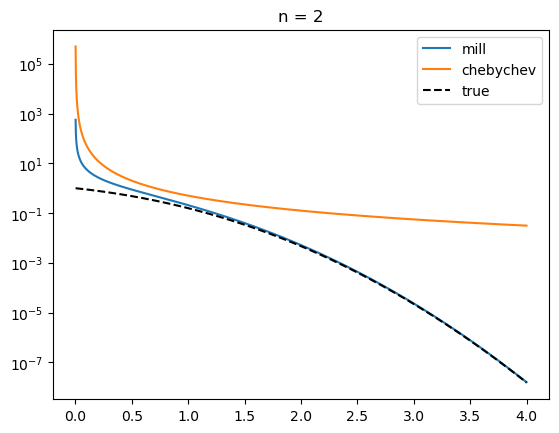

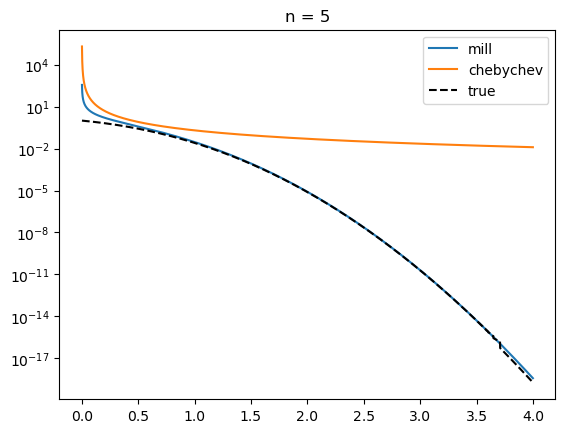

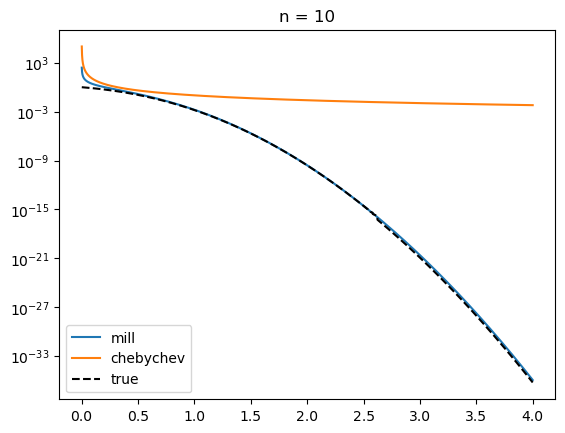

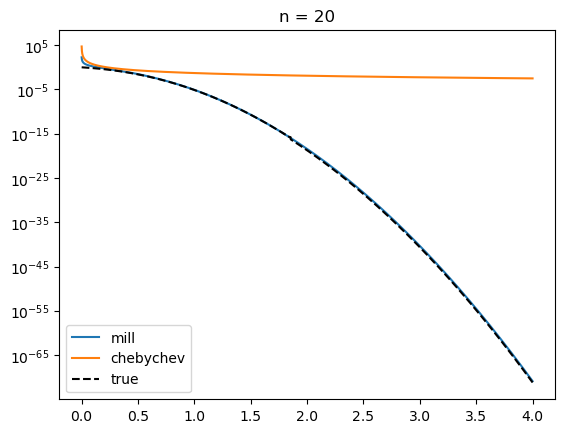

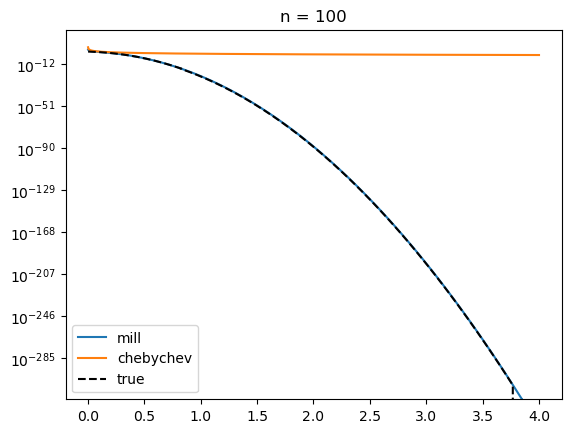

In [47]:
ns = [1, 2, 5, 10, 20, 100]

x = np.linspace(0.001, 4, 10000)

for n in ns:
    mean_mill_y = mean_mill_bound(x, n)
    plt.plot(x, mean_mill_y, label = 'mill')
    mean_chebychev_y = mean_chebychev_bound(x, n)
    plt.plot(x, mean_chebychev_y, label = 'chebychev')
    mean_true_y = true_prob(x * np.sqrt(n))
    plt.plot(x, mean_true_y, '--', label = 'true', color = 'k')
    plt.legend()
    plt.yscale('log')
    plt.title('n = ' + str(n))
    plt.show()

In [49]:
norm.cdf(-1)

0.15865525393145707